# Sidel Energy Anomaly Detection
### Wrangling & Exploratory Data Analysis (EDA)
This notebook loads the provided datasets (alarms & recipe performance for three machines) and performs initial wrangling and exploratory data analysis.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    'alarm_machine1': 'Data/alarm_machine1.csv',
    'alarm_machine2': 'Data/alarm_machine2.csv',
    'alarm_machine3': 'Data/alarm_machine3.csv',
    'recipe_machine1': 'Data/df_recipe_performance_machine1.csv',
    'recipe_machine2': 'Data/df_recipe_performance_machine2.csv',
    'recipe_machine3': 'Data/df_recipe_performance_machine3.csv',
    'description': 'Data/datasets_description.xlsx'
}

df_dict = {}
for key, path in file_paths.items():
    if path.endswith('.csv'):
        df_dict[key] = pd.read_csv(path)
    elif path.endswith('.xlsx'):
        df_dict[key] = pd.read_excel(path)

# Quick check
df_dict.keys()

dict_keys(['alarm_machine1', 'alarm_machine2', 'alarm_machine3', 'recipe_machine1', 'recipe_machine2', 'recipe_machine3', 'description'])

In [3]:
summary = []
for key, df in df_dict.items():
    rows, cols = df.shape
    missing = df.isna().sum().sum()
    summary.append({'dataset': key, 'rows': rows, 'cols': cols, 'missing_cells': missing})
pd.DataFrame(summary)

,dataset,rows,cols,missing_cells
0,alarm_machine1,1529,7,0
1,alarm_machine2,1212,7,0
2,alarm_machine3,102,7,0
3,recipe_machine1,7769,32,0
4,recipe_machine2,5292,32,0
5,recipe_machine3,5523,32,0
6,description,31,3,0


In [4]:
# Parse datetime columns where available
datetime_mappings = {
    'createdAt': ['alarm_machine1', 'alarm_machine2', 'alarm_machine3'],
    'timestamp': ['recipe_machine1', 'recipe_machine2', 'recipe_machine3']
}
for col, keys in datetime_mappings.items():
    for k in keys:
        if col in df_dict[k].columns:
            df_dict[k][col] = pd.to_datetime(df_dict[k][col])
            # Display range
            print(f"{k}: {col} from {df_dict[k][col].min()} to {df_dict[k][col].max()}")

alarm_machine1: createdAt from 2024-01-13 11:00:00 to 2025-03-26 11:00:00
alarm_machine2: createdAt from 2024-01-03 19:00:00 to 2025-03-30 22:00:00
alarm_machine3: createdAt from 2024-01-02 13:00:00 to 2024-11-29 23:00:00
recipe_machine1: timestamp from 2024-01-29 09:00:00+00:00 to 2025-03-31 23:00:00+00:00
recipe_machine2: timestamp from 2024-01-25 07:00:00+00:00 to 2025-03-31 23:00:00+00:00
recipe_machine3: timestamp from 2024-01-24 17:00:00+00:00 to 2025-03-31 23:00:00+00:00


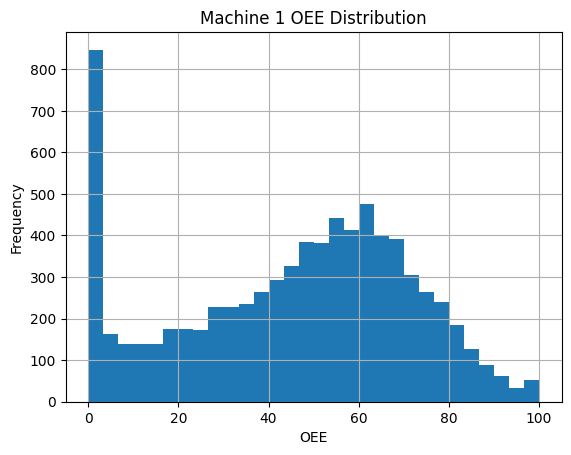

In [5]:
# Example histogram of OEE for machine 1 (if available)
if 'recipe_machine1' in df_dict and 'oee' in df_dict['recipe_machine1'].columns:
    df_dict['recipe_machine1']['oee'].hist(bins=30)
    plt.title('Machine 1 OEE Distribution')
    plt.xlabel('OEE')
    plt.ylabel('Frequency')
    plt.show()